In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import random
import matplotlib.pyplot as plt

## Gambler's Ruin as described in the book

In the game, a gambler puts money on stake till he is bankrupt, or wins has $100. The state space is {1,2,..., 99} and to each state, the action space is {0,1,...,min(s,100-s)}



In [3]:
win_prob = 0.25
threshold = 0.001

old_value = [0 for i in range(101)]
old_value[0] = 0
old_value[100] = 0

def reward(s):
    if s == 100:
        return 1
    else:
        return 0

new_value = [0 for i in range(101)]
for sweeps in range(100):
    for s in range(1,100):
        new_value[s] = max([win_prob*(old_value[s+a]+reward(s+a)) + 
                        (1-win_prob)*(old_value[s-a] + reward(s-a)) 
                        for a in range(1,min(s,100-s)+1)])       
    old_value = new_value
    


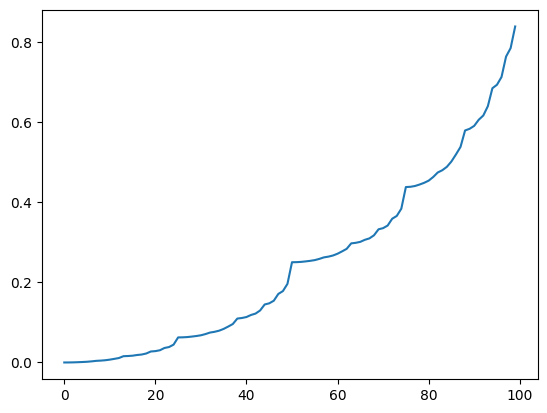

In [4]:
fig, ax = plt.subplots()
ax.plot(new_value[0:100]);

In [5]:
policy = [0 for i in range(99)]
for i in range(99):
    s = i+1
    policy[i] = np.argmax([win_prob*(new_value[s+a]+reward(s+a)) + 
                        (1-win_prob)*(new_value[s-a] + reward(s-a))
                           for a in range(1,min(s, 100-s)+1)])+1


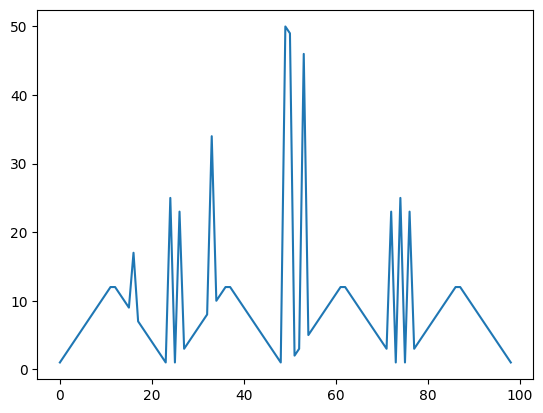

In [6]:
fig, ax = plt.subplots()
ax.plot(policy);